In [161]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pprint
import json
import requests
import gmaps
import os
from scipy.stats import linregress
from scipy import stats
#Increase font size of graphs Globally
plt.rc('xtick',labelsize=30)
plt.rc('ytick',labelsize=30)


# Import API key
from config import api_key

#API Base URL
base_url = 'http://hotline.whalemuseum.org/api.json'
data = requests.get(base_url)
print(data)

# Pretty Print the output of the JSON
responses = requests.get(base_url).json()
print(json.dumps(responses, indent=4, sort_keys=True))

<Response [200]>
[
    {
        "created_at": "2017-11-09T18:16:30Z",
        "description": "Spotted from the Edmonds-Kingston ferry, near fishing boats.",
        "id": "5a049b7e686f743ec5040000",
        "latitude": 47.79953,
        "location": "",
        "longitude": -122.47996699999999,
        "orca_type": "unknown",
        "quantity": "5",
        "sighted_at": "2017-11-09T18:11:00Z",
        "species": "orca",
        "updated_at": "2017-11-14T22:20:45Z",
        "url": "http://hotline.whalemuseum.org/sightings/5a049b7e686f743ec5040000"
    },
    {
        "created_at": "2017-10-01T00:41:04Z",
        "description": "From the Inn at Langley looking east there was a very large group of porpoise swimming south in the Saratoga passage",
        "id": "59d039a0686f743ec5020000",
        "latitude": 48.047447813103005,
        "location": "Camano Island, WA, US",
        "longitude": -122.40477597314452,
        "orca_type": "unknown",
        "quantity": "20",
        "sighted

In [162]:
#Empty Lists to store data
lat = []
location = []
long = []
orca_type = []
quantity = []
species = []
count = 1

# Initialize loop
for response in responses:
    lat.append(response['latitude'])
    long.append(response['longitude'])
    location.append(response['location'])
    species.append(response['species'])
    quantity.append(response['quantity'])
    orca_type.append(response['orca_type'])
    count = count + 1

orca_dict = {
    'Species': species,
    'Orca Type': orca_type,
    'Quantity': quantity,
    'Location': location,
    'Latitude': lat,
    'Longitude': long

}
# Convert dictionary to dataframe
orca_data = pd.DataFrame.from_dict(orca_dict)
orca_data.head()

,Species,Orca Type,Quantity,Location,Latitude,Longitude
0,orca,unknown,5,,47.799530,-122.479967
1,harbor porpoise,unknown,20,"Camano Island, WA, US",48.047448,-122.404776
2,humpback,unknown,1,"Gig Harbor, WA, US",47.307289,-122.561674
3,humpback,unknown,1,"Steilacoom, WA, US",47.166960,-122.614546
4,humpback,unknown,1,"Edmonds, WA, US",47.884579,-122.342120


In [163]:
#Reading CSV for whale data
filename = "resources\seamap_csv.csv"
seamap_data = pd.read_csv(filename, header=0, index_col=0)
#seamap_data
seamap_data.reset_index(drop=True, inplace=True)
seamap_data.drop(['oid', 'datasets', 'geom_wkt', 'csquare'], axis = "columns", inplace=True)
seamap_data


,longitude,latitude,providers,species,date_min,date_max,num_records,num_animals,num_species
0,-179,-72,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera bonaerensis,2/26/2018,2/26/2018,2,4.0,1
1,-179,-71,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,2/28/2018,3/1/2018,3,6.0,1
2,-179,-69,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/2/2018,3/2/2018,1,2.0,1
3,-179,-68,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera acutorostrata;Megaptera novaeangliae,12/23/1910,3/6/2018,6,24.0,2
4,-179,-67,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/6/2018,3/6/2018,5,11.0,1
...,...,...,...,...,...,...,...,...,...
16138,180,62,National Marine Mammal Laboratory;Wildlife Con...,Balaena mysticetus;Balaenoptera acutorostrata;...,6/1/1913,7/31/2010,10,21.0,4
16139,180,64,Russian Cetacean Habitat Project via Happywhal...,Balaena mysticetus;Megaptera novaeangliae,6/1/1913,8/3/2005,18,18.0,2
16140,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,7/1/1913,11,11.0,1
16141,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,6/1/1913,1,1.0,1


In [164]:
seamap_data = seamap_data.rename(columns={"longitude": "Longitude", "latitude": "Latitude", 
                            "providers": "Providers", "species": "Species", 
                            "date_min" : "First Sighting", "date_max": "Most Recent Sighting", "num_records" : 
                            "Number of Records", "num_animals": "Number Sighted" , "num_species" : "Number of Species Sighted"})
seamap_data

,Longitude,Latitude,Providers,Species,First Sighting,Most Recent Sighting,Number of Records,Number Sighted,Number of Species Sighted
0,-179,-72,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera bonaerensis,2/26/2018,2/26/2018,2,4.0,1
1,-179,-71,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,2/28/2018,3/1/2018,3,6.0,1
2,-179,-69,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/2/2018,3/2/2018,1,2.0,1
3,-179,-68,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera acutorostrata;Megaptera novaeangliae,12/23/1910,3/6/2018,6,24.0,2
4,-179,-67,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/6/2018,3/6/2018,5,11.0,1
...,...,...,...,...,...,...,...,...,...
16138,180,62,National Marine Mammal Laboratory;Wildlife Con...,Balaena mysticetus;Balaenoptera acutorostrata;...,6/1/1913,7/31/2010,10,21.0,4
16139,180,64,Russian Cetacean Habitat Project via Happywhal...,Balaena mysticetus;Megaptera novaeangliae,6/1/1913,8/3/2005,18,18.0,2
16140,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,7/1/1913,11,11.0,1
16141,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,6/1/1913,1,1.0,1


In [165]:

# configure gmaps api key
gmaps.configure(api_key = api_key)
# lat and lng locations / number of whales sighted
locations = seamap_data[['Latitude','Longitude']]
num_records = seamap_data['Number Sighted'].astype(float)
# plot heatmap
fig = gmaps.figure()
# create heatmap layer
numanimals_layer = gmaps.heatmap_layer(locations, weights = num_records,
                             dissipating = False, max_intensity = 10,
                             point_radius = .3)
# add layer
fig.add_layer(numanimals_layer)
# display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [166]:
scatter_data = seamap_data[['Latitude', 'Number Sighted']]
scatter_data = scatter_data.dropna()
scatter_data

,Latitude,Number Sighted
0,-72,4.0
1,-71,6.0
2,-69,2.0
3,-68,24.0
4,-67,11.0
...,...,...
16138,62,21.0
16139,64,18.0
16140,65,11.0
16141,65,1.0


In [167]:
x_values = scatter_data['Latitude'].squeeze()
x_values
y_values = scatter_data['Number Sighted'].squeeze()
y_values

0         4.0
1         6.0
2         2.0
3        24.0
4        11.0
         ... 
16138    21.0
16139    18.0
16140    11.0
16141     1.0
16142     1.0
Name: Number Sighted, Length: 14013, dtype: float64

The r-squared is: 0.004229267609795049


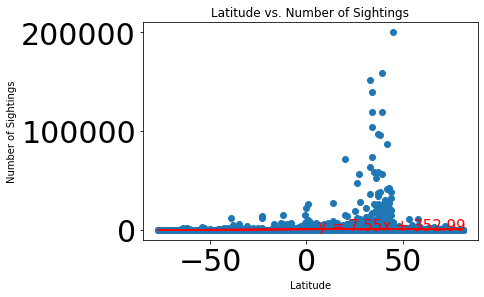

In [168]:
#Scatterplot for Latitude and Number of Whales sighted
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Number of Sightings")
plt.xlabel("Latitude")
plt.ylabel("Number of Sightings")
print(f"The r-squared is: {rvalue**2}")
plt.show()


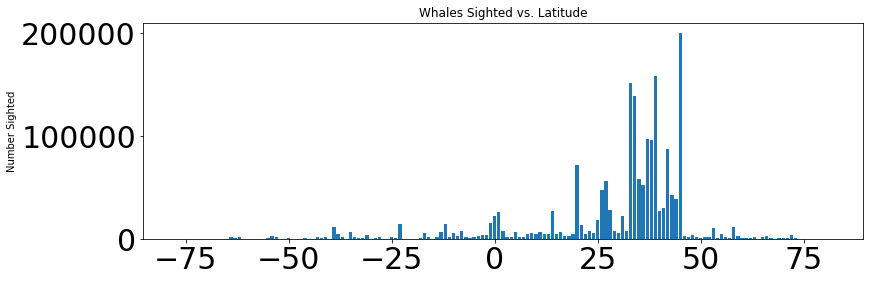

<Figure size 432x288 with 0 Axes>

In [169]:
# Generate a bar plot showing the total whale sightings vs. Latitude
x_values = seamap_data['Latitude']
y_values = seamap_data['Number Sighted']
fig = plt.figure(figsize=(10,3))
pyplot1 = fig.add_axes([0,0,1,1])
pyplot1.bar(x_values , y_values)
pyplot1.set_ylabel('Number Sighted')
pyplot1.set_title('Whales Sighted vs. Latitude')
plt.show()
plt.savefig("Graphs/Whale Sightings vs Latitude Bar Chart.png")


In [170]:
#Creating a dataframe that limits amount of species sighted to 1
seamap_data2 = seamap_data[seamap_data['Number of Species Sighted'] <=1]
seamap_data2

,Longitude,Latitude,Providers,Species,First Sighting,Most Recent Sighting,Number of Records,Number Sighted,Number of Species Sighted
0,-179,-72,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera bonaerensis,2/26/2018,2/26/2018,2,4.0,1
1,-179,-71,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,2/28/2018,3/1/2018,3,6.0,1
2,-179,-69,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/2/2018,3/2/2018,1,2.0,1
4,-179,-67,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/6/2018,3/6/2018,5,11.0,1
5,-179,-67,"Kevin Mackay, NIWA",Balaenoptera acutorostrata,12/10/1910,12/10/1910,1,NaN,1
...,...,...,...,...,...,...,...,...,...
16135,179,60,Wildlife Conservation Society,Balaena mysticetus,5/1/1913,5/1/1913,1,1.0,1
16137,180,62,Wildlife Conservation Society,Balaena mysticetus,5/1/1913,7/1/1913,7,7.0,1
16140,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,7/1/1913,11,11.0,1
16141,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,6/1/1913,1,1.0,1


In [171]:
#Single Species Dataframe Analysis
seamap_data2.describe()

,Longitude,Latitude,Number of Records,Number Sighted,Number of Species Sighted
count,8896.000000,8896.000000,8896.000000,8072.000000,8896.0
mean,5.810926,-3.013377,4.080036,5.689792,1.0
std,111.993176,35.890686,40.817510,27.712360,0.0
min,-180.000000,-79.000000,1.000000,0.000000,1.0
25%,-77.000000,-32.000000,1.000000,1.000000,1.0
50%,-8.000000,-6.000000,2.000000,2.000000,1.0
75%,117.000000,28.000000,4.000000,4.000000,1.0
max,180.000000,81.000000,2632.000000,1178.000000,1.0


In [172]:
plot_seamap_df = seamap_data2[['Species', 'Number Sighted']]
plot_seamap_df.groupby('Species').sum()

,Number Sighted
Species,
Balaena mysticetus,1501.0
Balaenoptera,24.0
Balaenoptera acutorostrata,54.0
Balaenoptera bonaerensis,117.0
Balaenoptera borealis,33.0
...,...
Tursiops aduncus,0.0
Tursiops truncatus,1828.0
Tursiops truncatus ponticus,4.0


In [173]:
%matplotlib inline

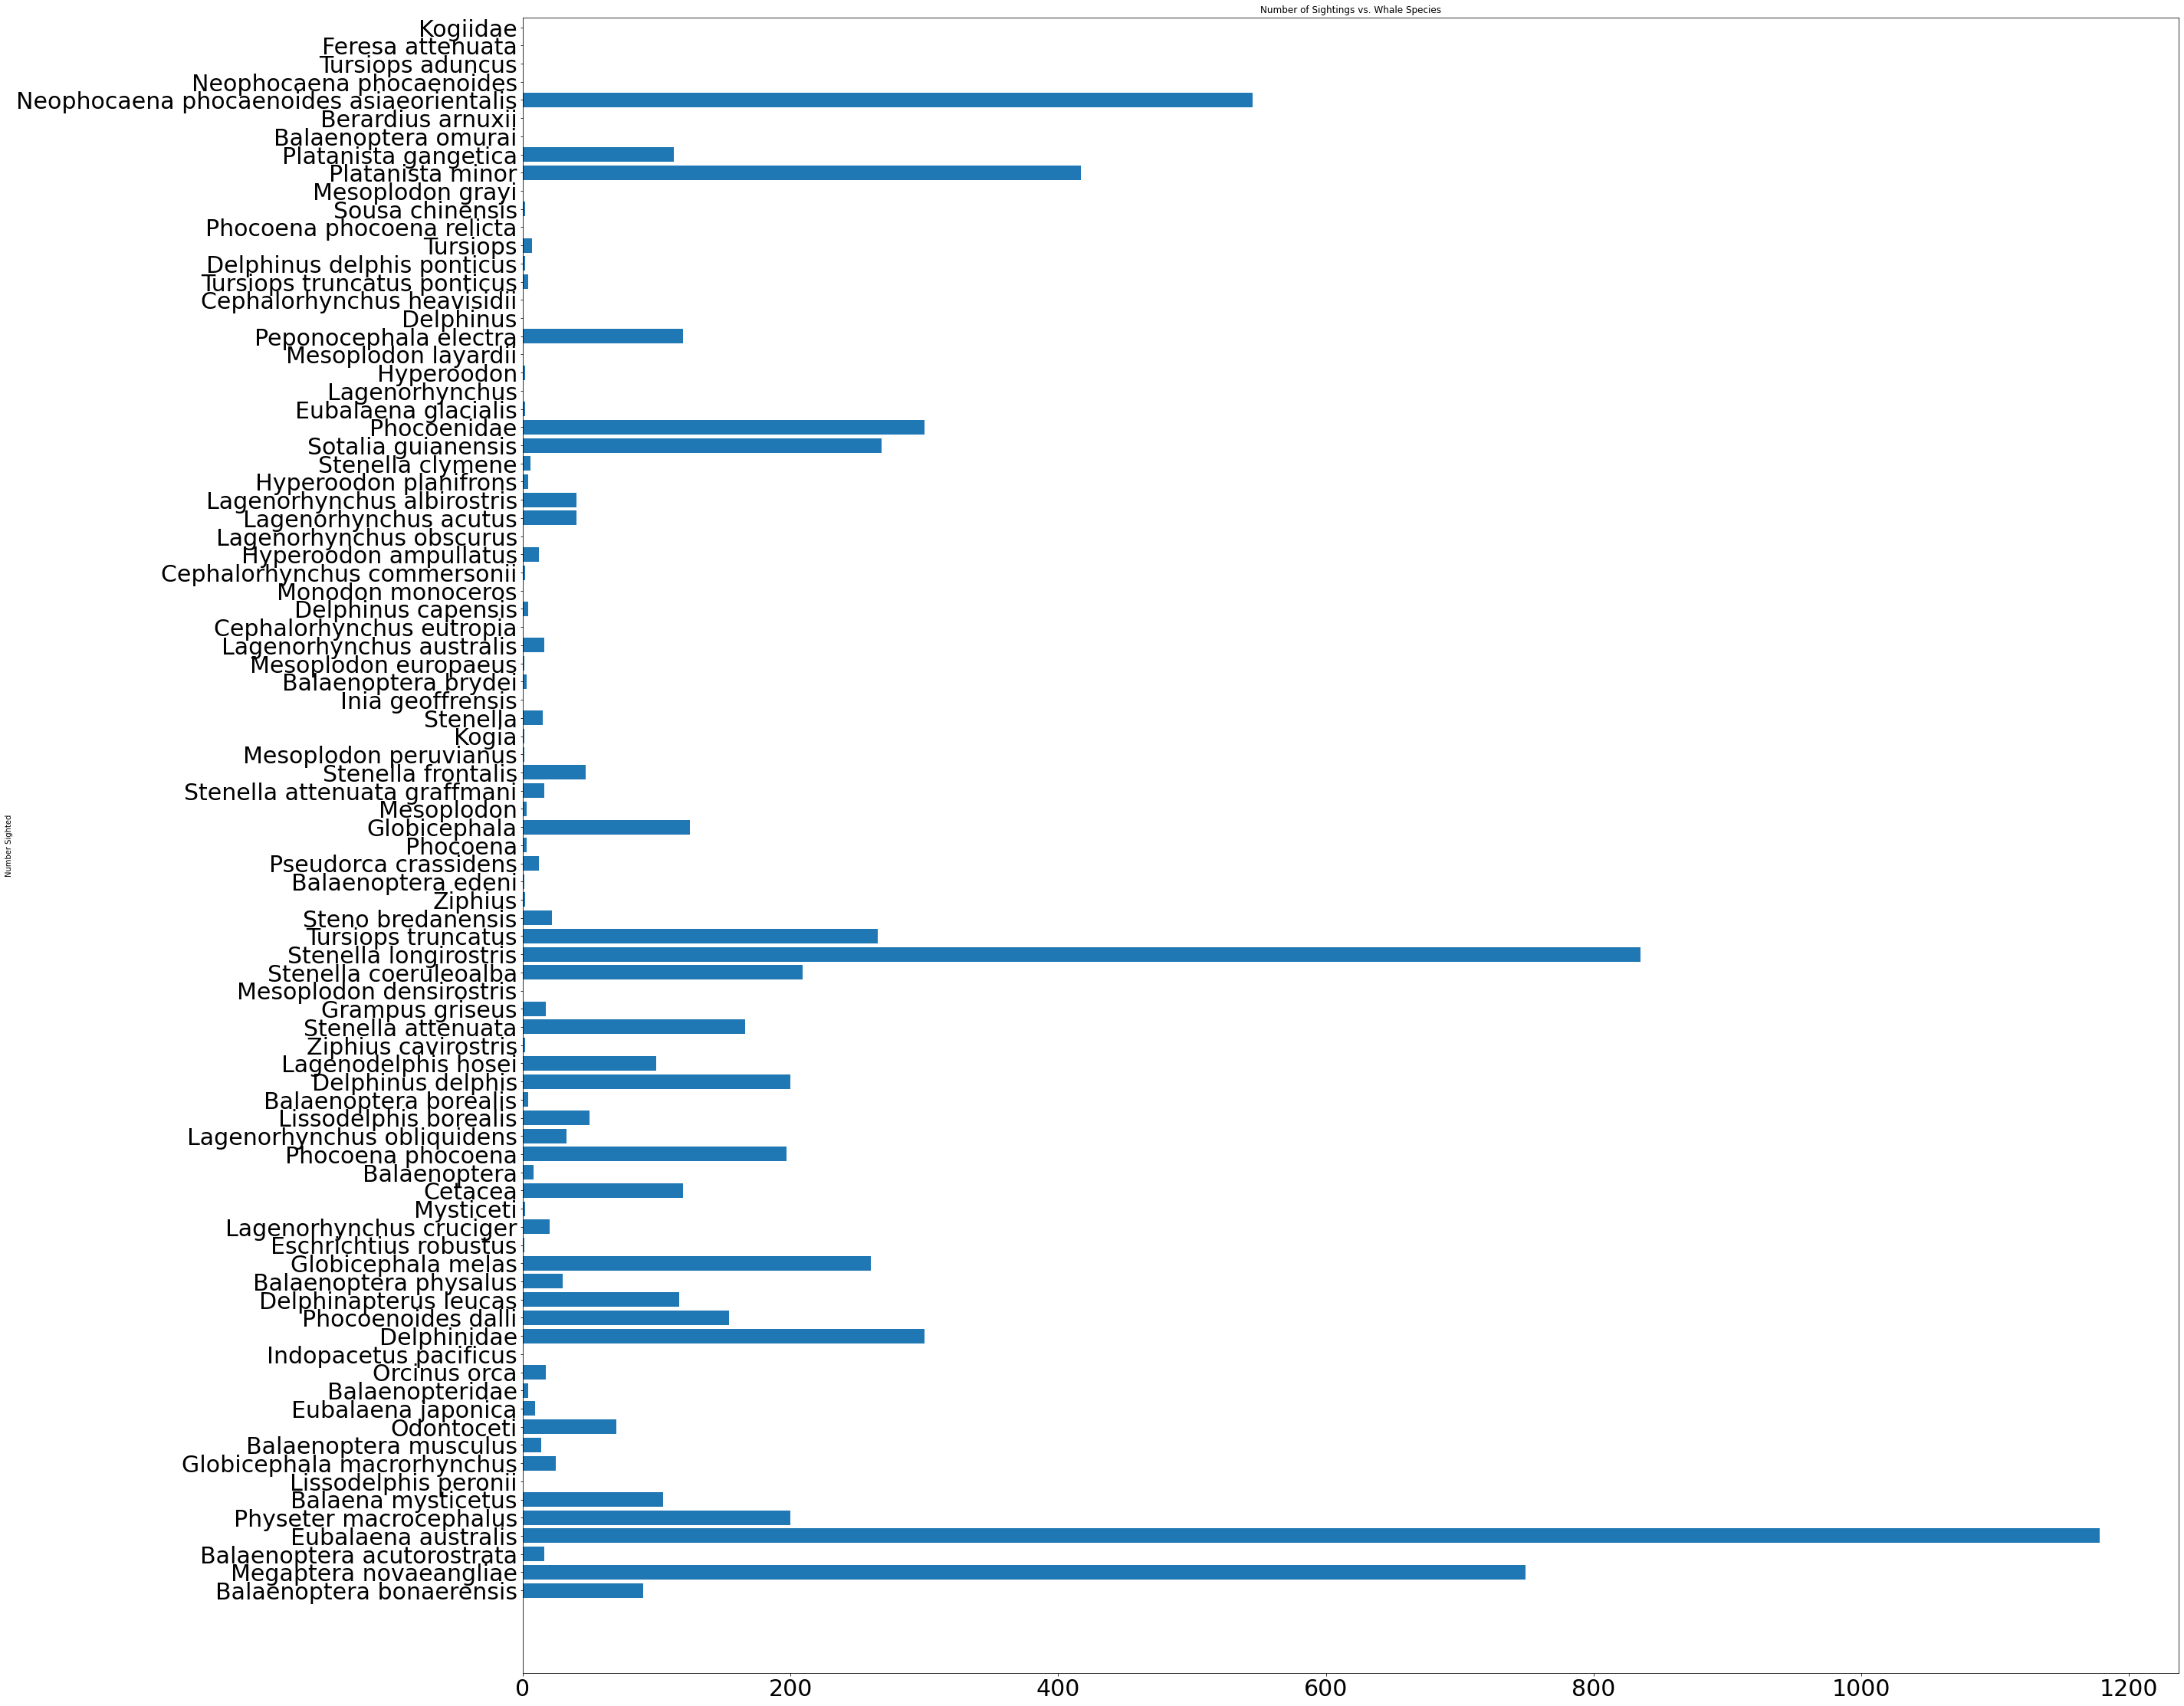

<Figure size 432x288 with 0 Axes>

In [174]:
# Generate a bar plot showing the total whale sightings vs. Species
x_values = plot_seamap_df['Species']
y_values = plot_seamap_df['Number Sighted']
fig = plt.figure(figsize=(30,30))
pyplot2 = fig.add_axes([0,0,1,1])
pyplot2.barh(x_values, y_values)
plt.ylabel('Number Sighted')
plt.title('Number of Sightings vs. Whale Species')
plt.show()
#GET TO WORK WITH SORTING _____________________________________
plot_seamap_df.sort_values(by='Species', ascending=False)
#Save Plot into .PNG File
plt.savefig("Graphs/Whale Sightings vs Whale Species.png")


In [175]:
# configure gmaps api key
gmaps.configure(api_key = api_key)
# lat and lng locations / number of whales sighted
locations = seamap_data[['Latitude','Longitude']]
num_records = seamap_data['Number of Species Sighted'].astype(float)
# plot heatmap
fig = gmaps.figure()
# create heatmap layer
numanimals_layer = gmaps.heatmap_layer(locations, weights = num_records,
                             dissipating = False, max_intensity = 10,
                             point_radius = .5)
# add layer
fig.add_layer(numanimals_layer)
# display figure
fig


Figure(layout=FigureLayout(height='420px'))

In [176]:
#Top 5 species sighted Dataframe and summary stats
plot_seamap_df = seamap_data2[['Species', 'Number Sighted']]
plot_seamap_df.groupby('Species').sum()
plot_seamap_df.sort_values(by='Number Sighted', ascending=False)
top5 = plot_seamap_df.nlargest(10,'Number Sighted')
top5.describe()

,Number Sighted
count,10.000000
mean,602.700000
std,279.562376
min,300.000000
25%,420.750000
50%,515.500000
75%,776.000000
max,1178.000000


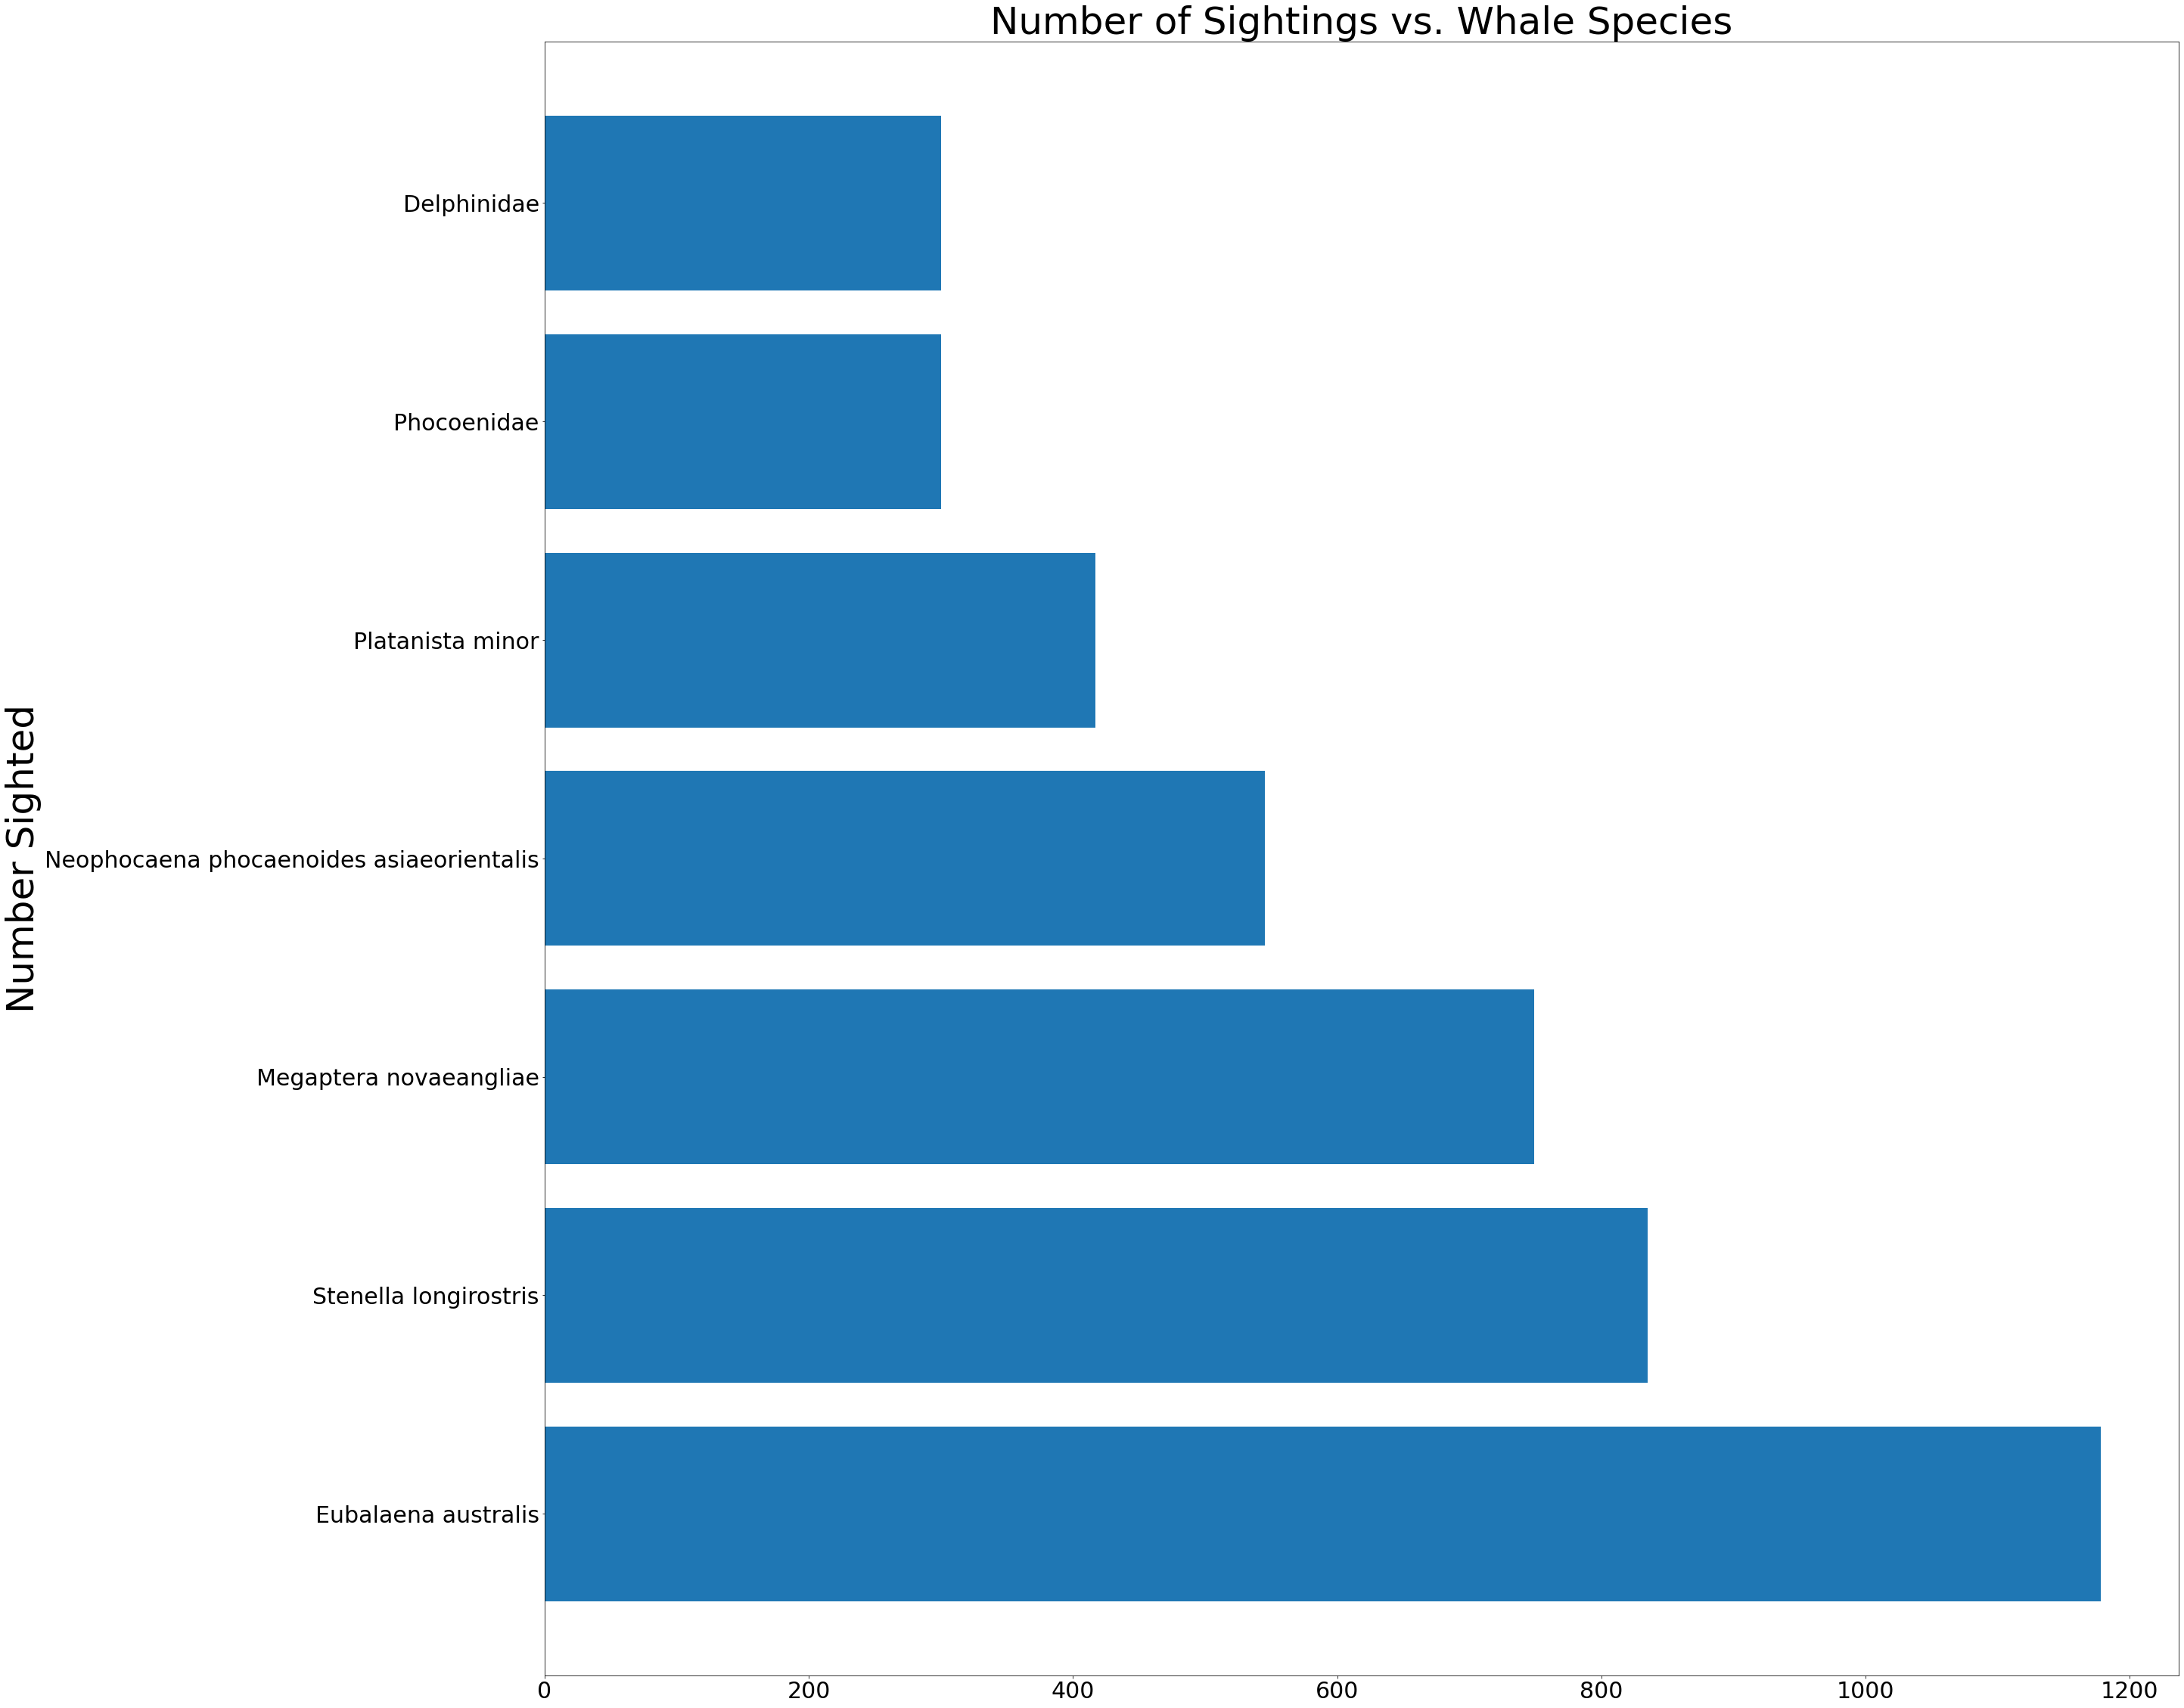

<Figure size 432x288 with 0 Axes>

In [178]:
# Generate a bar plot showing the TOP 5 total whale sightings vs. Species
x_values = top5['Species']
y_values = top5['Number Sighted']
fig = plt.figure(figsize=(30,30))
pyplot2 = fig.add_axes([0,0,1,1])
pyplot2.barh(x_values, y_values)
plt.ylabel('Number Sighted', fontsize=50)
plt.title('Number of Sightings vs. Whale Species', fontsize=50)
plt.show()
#plt.tight_layout()

#Save Plot into .PNG File
plt.savefig("Graphs/Top 5 Whale Sightings vs Whale Species.png")